# Interacting Tanks

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE30338](https://github.com/jckantor/CBE30338).

## Problem Statement

The following diagram shows a pair of interacting tanks.

![Image of a two interacting tanks](../images/InteractingTanks.png)

Assume the pressure driven flow into and out of the tanks is linearly proportional to tank levels. The steady state flowrate through the tanks is 3 cubic ft per minute, the steady state heights are 7 and 3 feet, respectively, and a constant cross-sectional area 5 sq. ft. The equations are written as

$$\begin{align*}
\frac{dh_1}{dt} & = \frac{F_0}{A_1} - \frac{\beta_1}{A_1}\left(h_1-h_2\right) \\
\frac{dh_2}{dt} & = \frac{\beta_1}{A_2}\left(h_1-h_2\right) - \frac{\beta_2}{A_2}h_2
\end{align*}$$

**a.** Use the problem data to determine values for all constants in the model equations.

**b.** Construct a Phython simulation using `odeint`, and show a plot of the tank levels as function of time starting with an initial condition $h_1(0)=6$ and $h_2(0)$ = 5. Is this an overdamped or underdamped system.

## Solution

### Part a. 

The parameters that need to be determined are $\beta_1$ and $\beta_2$. At steady state all of the flows must be identical and

$$\begin{align*}
0 & = F_0 - \beta_1(h_1 - h_2) \\
0 & = \beta_1(h_1 - h_2) - \beta_2h_2 
\end{align*}$$

Substituting problem data,

$$\beta_1 = \frac{F_0}{h_1-h_2} = \frac{3\text{ cu.ft./min}}{4\text{ ft}} = 0.75\text{ sq.ft./min}$$ 

$$\beta_2 = \frac{\beta_1(h_1 - h_2)}{h_2} = \frac{3\text{ cu.ft./min}}{3\text{ ft}} = 1.0\text{ sq.ft./min}$$ 

### Part b.

The next step is perform a simulation from a specified initial condition. 

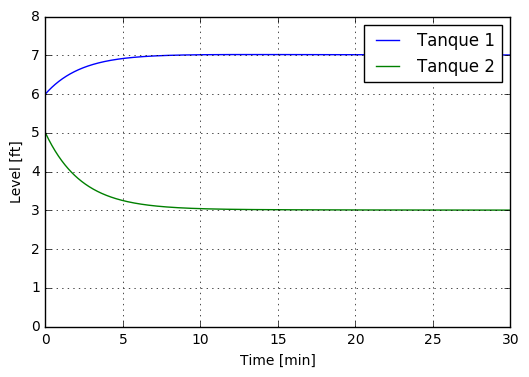

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

# simulation time grid
t = np.linspace(0,30,1000)

# initial condition
IC = [6,5]

# inlet flowrate
F0 = 3

# parameters for tank 1 
A1 = 5
beta1 = 0.75

# parameters for tank 2
A2 = 5
beta2 = 1.0

def hderiv(H, t):
    h1,h2 = H
    h1dot = (F0 - beta1*(h1-h2))/A1
    h2dot = (beta1*(h1-h2) - beta2*h2)/A2
    return [h1dot,h2dot]


sol = odeint(hderiv,IC,t)
plt.plot(t,sol)
plt.ylim(0,8)
plt.grid()
plt.xlabel('Time [min]')
plt.ylabel('Level [ft]')
plt.legend(['Tanque 1', 'Tanque 2'])

##### Further Calculations

$$\frac{d}{dt}\left[\begin{array}{c} h_1 \\ h_2 \end{array}\right] = 
\left[\begin{array}{cc}-\frac{\beta_1}{A_1} & \frac{\beta_1}{A_1} \\
\frac{\beta_1}{A_2} & -\frac{\beta_1}{A_2} - \frac{\beta_2}{A_2} \end{array}\right]
\left[\begin{array}{c}h_1 \\ h_2\end{array}\right]
+
\left[\begin{array}{c}\frac{1}{A_1} \\ 0\end{array}\right]F_0$$